In [2]:
import tensorflow as tf
print(tf.__version__)
!pip install tensorflow==2.0.0alpha0

2.2.0-rc3
     |████████████████████████████████| 79.9MB 122kB/s 
     |████████████████████████████████| 419kB 42.8MB/s 
     |████████████████████████████████| 3.0MB 42.5MB/s 
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
import zipfile
import os
from shutil import copyfile
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
!pip install -q kaggle

In [5]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthik1145","key":"bd89a0200e432d487eb747e6114fee01"}'}

In [6]:
os.mkdir('/root/.kaggle')
copyfile('/content/kaggle.json','/root/.kaggle/kaggle.json')

'/root/.kaggle/kaggle.json'

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 43.6MB/s]
100% 2.29G/2.29G [00:29<00:00, 84.4MB/s]


In [0]:
path='/content/chest-xray-pneumonia.zip'
zip_ref=zipfile.ZipFile(path,'r')

zip_ref.extractall('/content')
zip_ref.close()

In [32]:
train_gen=ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=0.2,
    shear_range=0.2,
)
test_gen=ImageDataGenerator(
    rescale=1.0/255.0
)

train_generator=train_gen.flow_from_directory(
    '/content/chest_xray/chest_xray/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)


test_generator=test_gen.flow_from_directory(
    '/content/chest_xray/chest_xray/test',
    batch_size=32,
    target_size=(64,64),
    class_mode='binary',
    color_mode='rgb'
)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [52]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3),padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 31, 31, 32)        9248      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 32)      

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


In [54]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=163,  
      epochs=15,
      verbose=1,
      validation_data = train_generator,        
      validation_steps=32)

Epoch 1/15
163/163 [==============================] - 134s 820ms/step - loss: 0.5505 - acc: 0.7648 - val_loss: 0.3963 - val_acc: 0.7871
Epoch 2/15
163/163 [==============================] - 125s 767ms/step - loss: 0.2527 - acc: 0.8944 - val_loss: 0.1445 - val_acc: 0.9375
Epoch 3/15
163/163 [==============================] - 124s 760ms/step - loss: 0.1591 - acc: 0.9402 - val_loss: 0.1082 - val_acc: 0.9590
Epoch 4/15
163/163 [==============================] - 122s 747ms/step - loss: 0.1354 - acc: 0.9517 - val_loss: 0.1092 - val_acc: 0.9531
Epoch 5/15
163/163 [==============================] - 121s 743ms/step - loss: 0.1244 - acc: 0.9507 - val_loss: 0.0767 - val_acc: 0.9697
Epoch 6/15
163/163 [==============================] - 120s 737ms/step - loss: 0.1101 - acc: 0.9597 - val_loss: 0.1480 - val_acc: 0.9414
Epoch 7/15
163/163 [==============================] - 121s 740ms/step - loss: 0.1090 - acc: 0.9594 - val_loss: 0.0809 - val_acc: 0.9658
Epoch 8/15
163/163 [============================

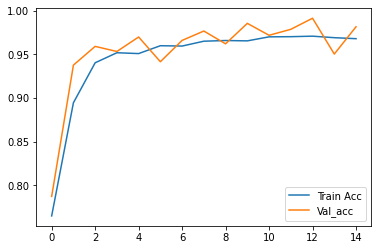

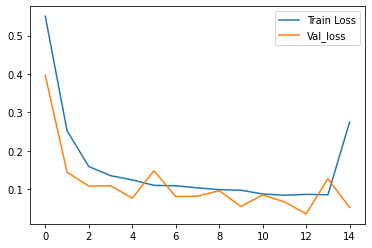

In [55]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,label='Train Acc')
plt.plot(epochs,val_acc,label='Val_acc')
plt.legend()
plt.figure()
plt.plot(epochs,loss,label='Train Loss')
plt.plot(epochs,val_loss,label='Val_loss')
plt.legend()

